In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:
#Importing the data
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
#Reading the csv file
df = pd.read_csv("FuelConsumptionCo2.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [17]:
# COnsidering only required columns
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0155D590>,
      dtype=object)

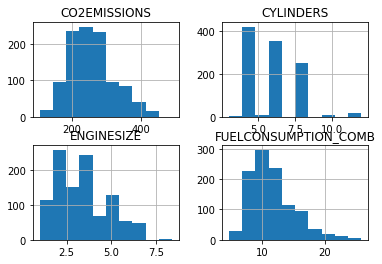

In [19]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'CO2 Emission')

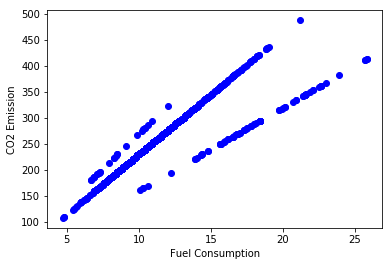

In [21]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")

Text(0, 0.5, 'CO2 Emission')

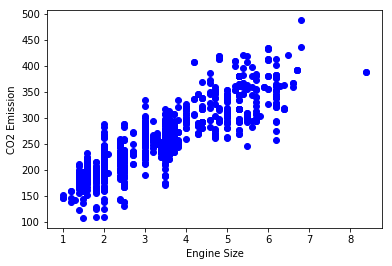

In [22]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

Text(0, 0.5, 'CO2 Emission')

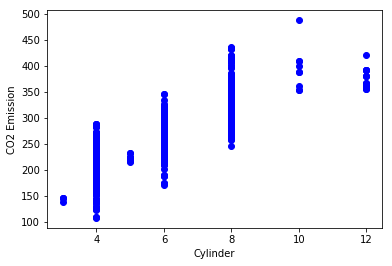

In [23]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinder")
plt.ylabel("CO2 Emission")

In [25]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True, ...,  True,  True,  True])

In [27]:
train = cdf[msk]
test = cdf[~msk]

Text(0, 0.5, 'CO2 Emission')

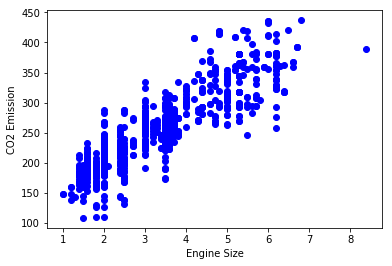

In [28]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

In [31]:
#Fitting the model
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
#Coefficients
print("COefficient ", regr.coef_)
print("Intercept ",regr.intercept_)

COefficient  [[39.5018242]]
Intercept  [124.22345409]


Text(0, 0.5, 'CO2 Emission')

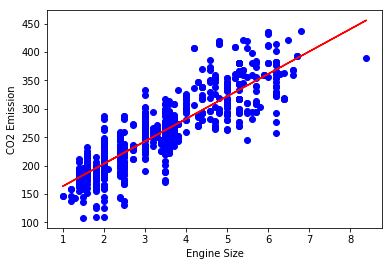

In [34]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.intercept_[0] + regr.coef_[0][0] * train_x, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

In [39]:
# predict the test set
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_hat = regr.predict(test_x)
print('Mean Absolute Error: % 0.2f' %np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of errors (MSE) %0.2f" %np.mean((test_y_hat - test_y)**2))
print("R2-square : %.2f" %r2_score(test_y_hat,test_y))

Mean Absolute Error:  21.90
Residual sum of errors (MSE) 800.23
R2-square : 0.76
